In [1]:
# importing libraries
import pandas as pd
import numpy as np
import gensim
from gsdmm import MovieGroupProcess
import os
import pyLDAvis
import pyLDAvis.gensim_models
import math
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import ChainMap

C:\Users\clwhitfield\Anaconda3\lib\site-packages\scipy\io\matlab\mio5.py:98: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from .mio5_utils import VarReader5
C:\Users\clwhitfield\Anaconda3\lib\site-packages\_pytest\mark\structures.py:443: DeprecationWarning: The usage of `cmp` is deprecated and will be removed on or after 2021-06-01.  Please use `eq` and `order` instead.
  @attr.s(cmp=False, hash=False)
C:\Users\clwhitfield\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. 

In [2]:
os.chdir('../')

In [3]:
eth_list = ['asians_pre', 'asians_post', 'blacks_pre', 'blacks_post']
cities_list = ['nycThread']
#cities_list = ['nyc','LosAngeles','houston', 'chicago','philadelphia','combined']

In [4]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=False))  # deacc=True removes punctuations

In [5]:
# define function to get top words per topic
def top_words(cluster_word_distribution, top_cluster, values):
    list_dict = []
    for cluster in top_cluster:
        sort_dicts = sorted(cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:values]
        list_dict.append(sort_dicts)
        print("\nCluster %s : %s"%(cluster, sort_dicts))
    return list_dict
        

In [8]:
def getTopicModels(sName,c):
    output_dir = os.getcwd() + r'/Models/'
    try: 
        os.makedirs(output_dir +r'GSDMM/%s'%c, exist_ok = True) 
        #print("Directory '%s' created successfully" %output_dir) 
    except OSError as error: 
            print("Directory '%s' can not be created")

    df = pd.read_csv(os.getcwd() + r'/data/cleaned_data/%s_%s.csv' %(sName,c), encoding = 'utf-8')
    df.cleaned_comments = df.cleaned_comments.apply(str).astype('U').values


    df = df[df.cleaned_comments.apply(lambda x: len(x.split(' ')) > 3)]
    df = df.reset_index(drop=True)
    data = df.cleaned_comments.tolist()
    docs = list(sent_to_words(data))
    
    # create dictionary of all words in all documents
    dictionary = gensim.corpora.Dictionary(docs)

    # filter extreme cases out of dictionary
    dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

    # create variable containing length of dictionary/vocab
    vocab_length = len(dictionary)

    # create BOW dictionary
    bow_corpus = [dictionary.doc2bow(doc) for doc in docs]

    # initialize GSDMM
    gsdmm = MovieGroupProcess(K=7, alpha=0.1, beta=0.3, n_iters=15)

    # fit GSDMM model
    y = gsdmm.fit(docs, vocab_length)
    
    # print number of documents per topic
    doc_count = np.array(gsdmm.cluster_doc_count)
    print('Number of documents per topic :', doc_count)

    # Topics sorted by the number of document they are allocated to
    top_index = doc_count.argsort()[-15:][::-1]
    print('Most important clusters (by number of docs inside):', top_index)
    
    cluster_word_distribution = gsdmm.cluster_word_distribution
    
    topic_dict = []
    # get top words in topics
    topic_dict = top_words(cluster_word_distribution, top_index, 20)

    #topic_dict = dict(ChainMap(*topic_dict))
    # Generate a word cloud image

    for t in topic_dict:
        wordcloud = WordCloud(background_color='white', 
                                    width=1800,
                                    height=700,
                                    #font_path=path_to_font,
                                    colormap='brg').generate_from_frequencies(dict(t))

        # Print to screen
        fig, ax = plt.subplots(figsize=[20,10])
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")

        # Save to disk
        plt.savefig(output_dir +r'GSDMM/%s/%s_%s_Topic_%s.png'%(c,sName,c,topic_dict.index(t)), bbox_inches='tight')
        

In stage 0: transferred 209 clusters with 7 clusters populated
In stage 1: transferred 21 clusters with 7 clusters populated
In stage 2: transferred 8 clusters with 6 clusters populated
In stage 3: transferred 4 clusters with 5 clusters populated
In stage 4: transferred 2 clusters with 6 clusters populated
In stage 5: transferred 3 clusters with 6 clusters populated
In stage 6: transferred 2 clusters with 5 clusters populated
In stage 7: transferred 2 clusters with 5 clusters populated
In stage 8: transferred 3 clusters with 5 clusters populated
In stage 9: transferred 1 clusters with 6 clusters populated
In stage 10: transferred 4 clusters with 6 clusters populated
In stage 11: transferred 5 clusters with 6 clusters populated
In stage 12: transferred 2 clusters with 5 clusters populated
In stage 13: transferred 1 clusters with 5 clusters populated
In stage 14: transferred 3 clusters with 6 clusters populated
Number of documents per topic : [  0   5   1  11   7   1 219]
Most important 

ValueError: We need at least 1 word to plot a word cloud, got 0.

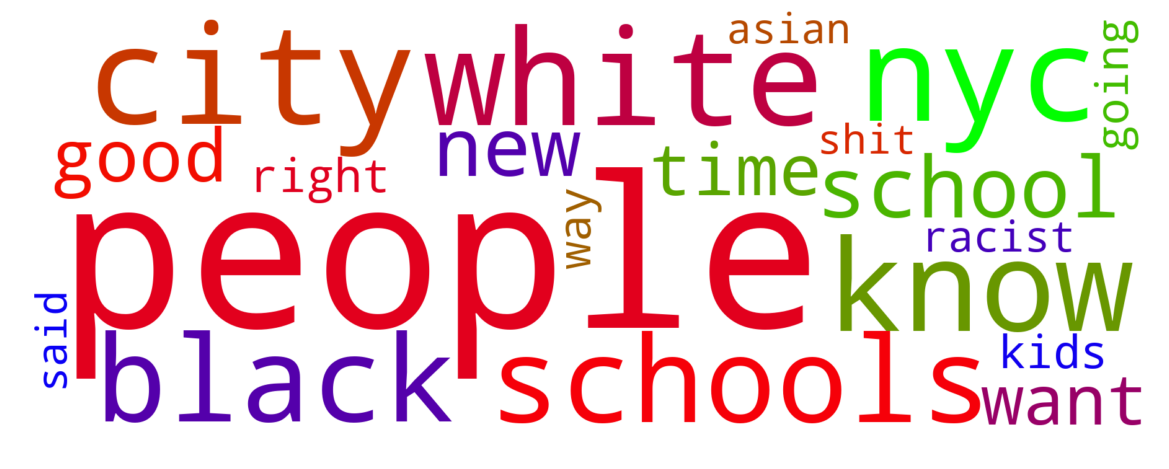

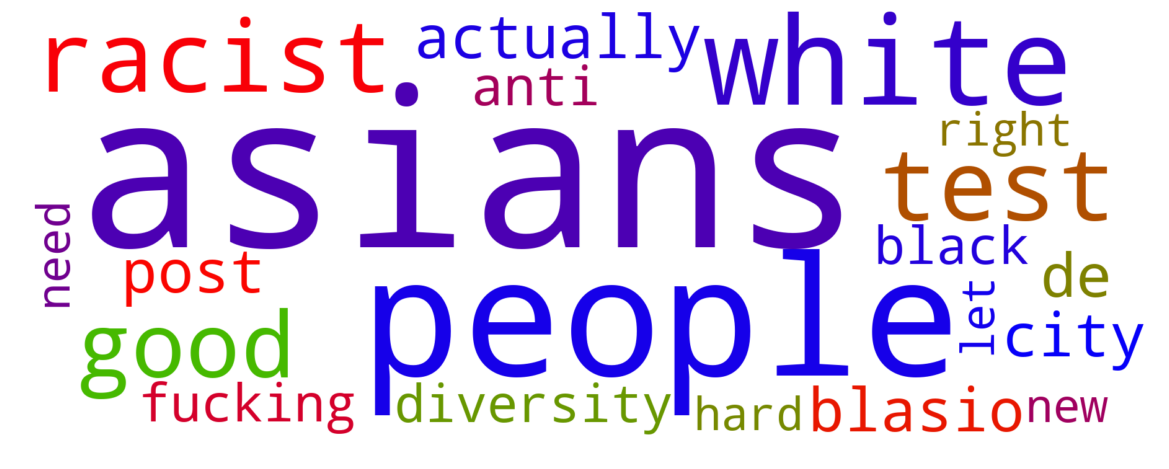

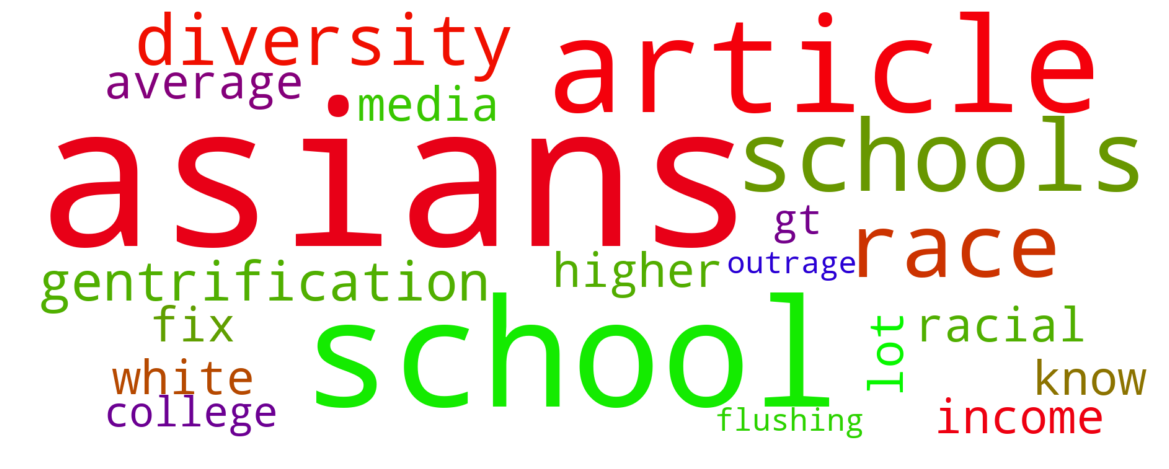

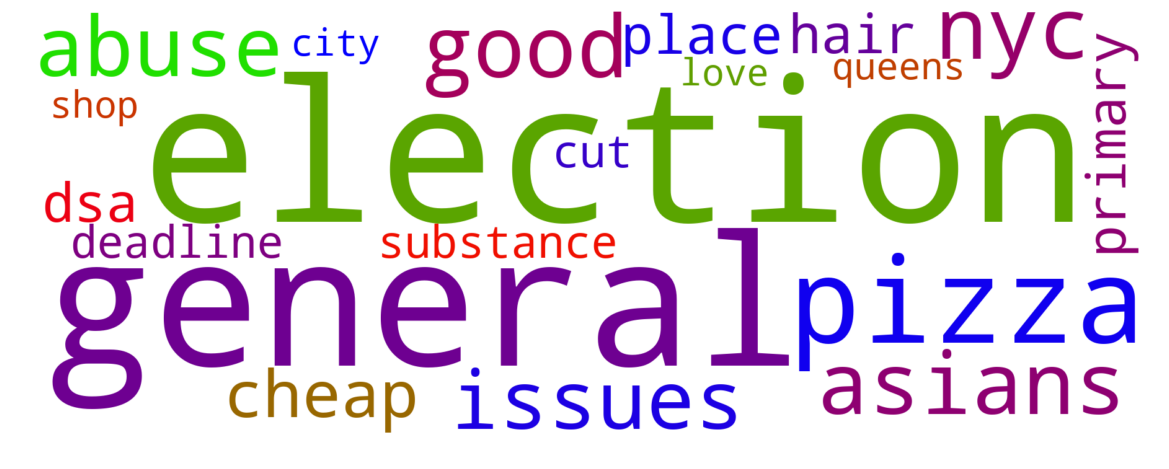

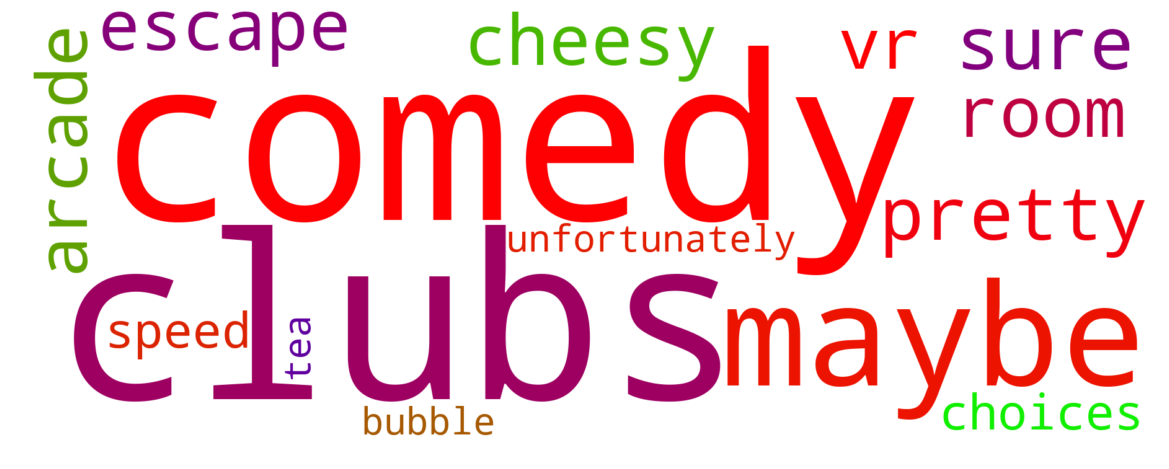

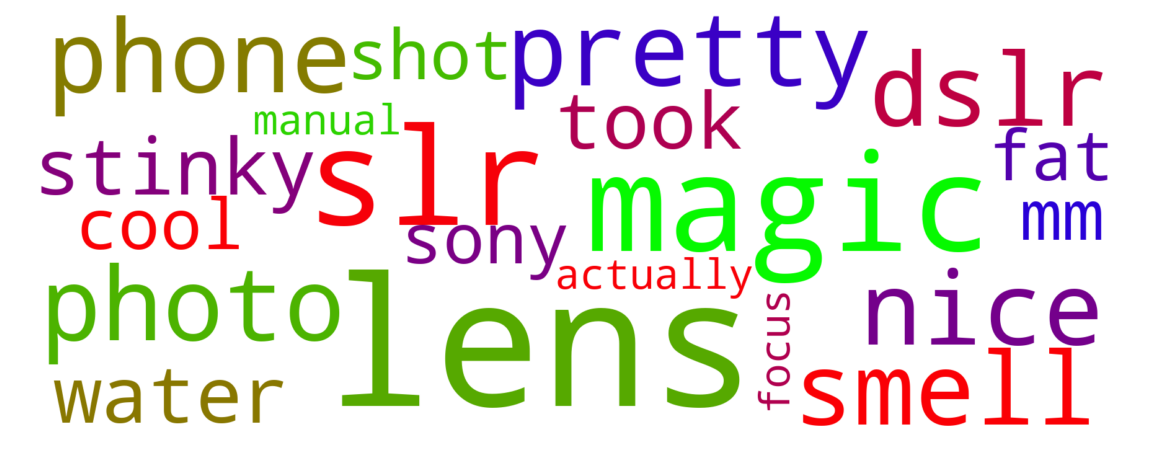

In [9]:
for i in eth_list:#[:1]:
    for j in cities_list:#[:1]:
        getTopicModels(i,j)